<a href="https://colab.research.google.com/github/Umar-604/CS-351-AI-Lab-Github-Repository_2022604/blob/main/Umar_Tariq_CS351L_Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CS-351L Aritificial Intelligence Lab-08**

##**Lab Title: Basics of Neural Networks - Building, Training, and Evaluating**

Course Information:

Course Code: CS 351L

Course Title: Artificial Intelligence Lab

Instructor: Mr. Usama Arshad, PhD CS

Program: BS Cybersecurity

Semester: 5th

Reference for Lab Resources:
[CS 351L - AI Lab GitHub Repository]
(https://github.com/usamajanjua9/CS-351L---AI-Lab-)

---


# **Exploring Neural Networks:**

## **Objective**
The goal is to understand and extend a neural network model by:
1. Modifying an existing model to add complexity and evaluating its performance.
2. Applying a new neural network to a different dataset to compare results.

---

## **Part 1: Modifying the Neural Network**

### **Step 1: Load and Preprocess the Iris Dataset**
- **Dataset**: The Iris dataset, a classic dataset for classification tasks.
- **Preprocessing**:
  - The features are already scaled, so no further scaling is required.
  - The target labels are one-hot encoded to prepare for multi-class classification.

### **Step 2: Build and Train the Original Network**
- A simple feedforward neural network is constructed with:
  - An input layer matching the number of features.
  - A single hidden layer with 8 neurons and ReLU activation.
  - An output layer with 3 neurons and softmax activation for classification.
- The model is trained using cross-entropy loss and Adam optimizer.

### **Step 3: Modify the Network**
- **Modification**:
  - An additional hidden layer with 16 neurons and ReLU activation is added to increase model capacity.
- The modified network is trained using the same procedure as the original.

### **Step 4: Compare Performance**
- Metrics such as training/validation loss and accuracy are compared between the original and modified models to analyze the impact of the additional layer.

---



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.1936 - loss: 1.3121 - val_accuracy: 0.2500 - val_loss: 1.2840
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1784 - loss: 1.2805 - val_accuracy: 0.2500 - val_loss: 1.2586
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1455 - loss: 1.3130 - val_accuracy: 0.2500 - val_loss: 1.2337
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1597 - loss: 1.2603 - val_accuracy: 0.2500 - val_loss: 1.2099
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2205 - loss: 1.2279 - val_accuracy: 0.2500 - val_loss: 1.1871
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2594 - loss: 1.1906 - val_accuracy: 0.2500 - val_loss: 1.1644
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1610 - loss: 1.2025 - val_accuracy: 0.2500 - val_loss: 1.1415
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1987 - loss: 1.1299 - val_accuracy: 0.2917 - val_loss: 1.1207

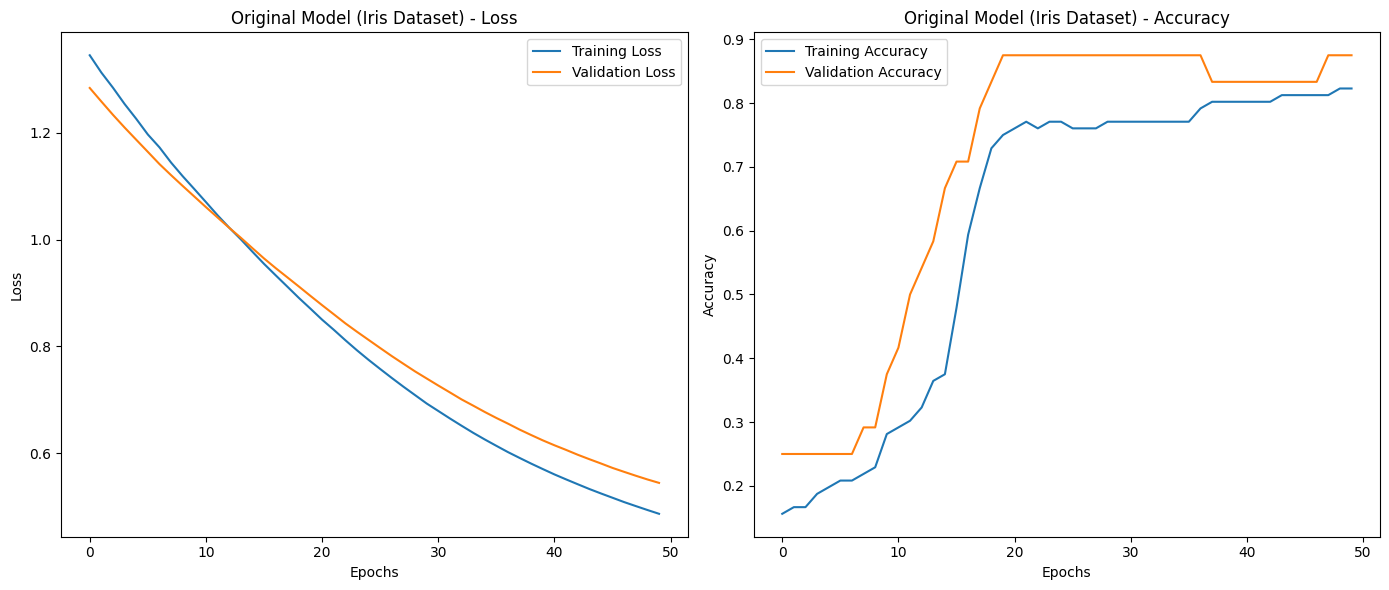

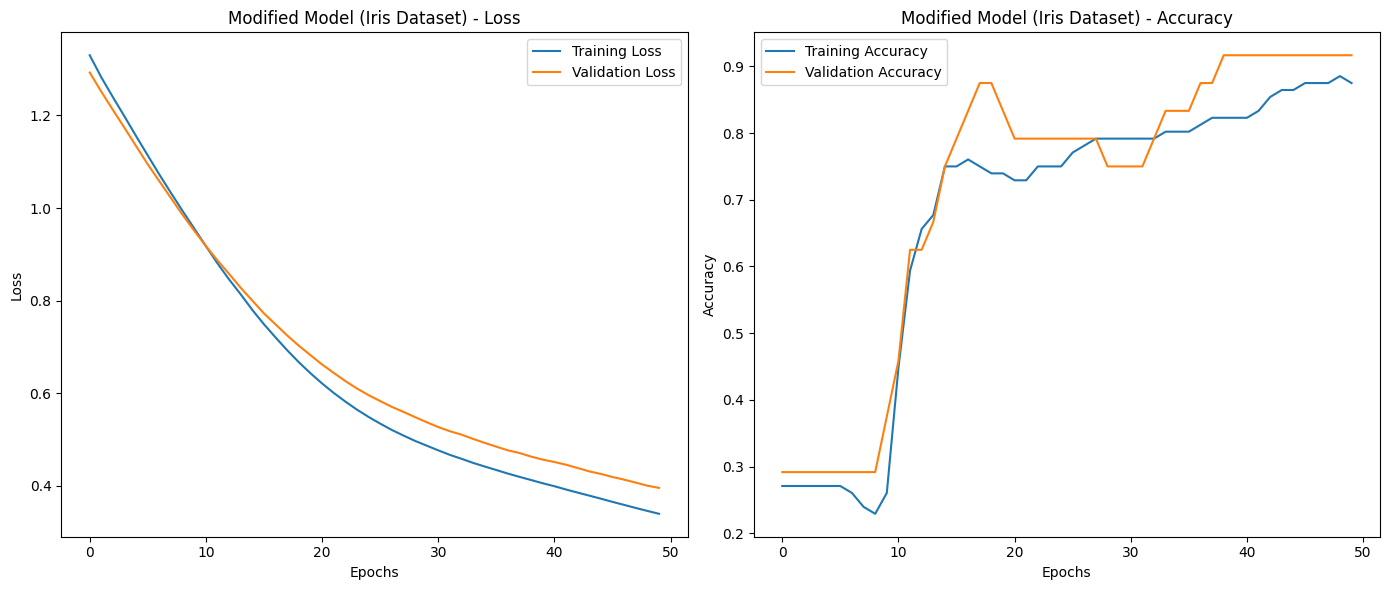

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


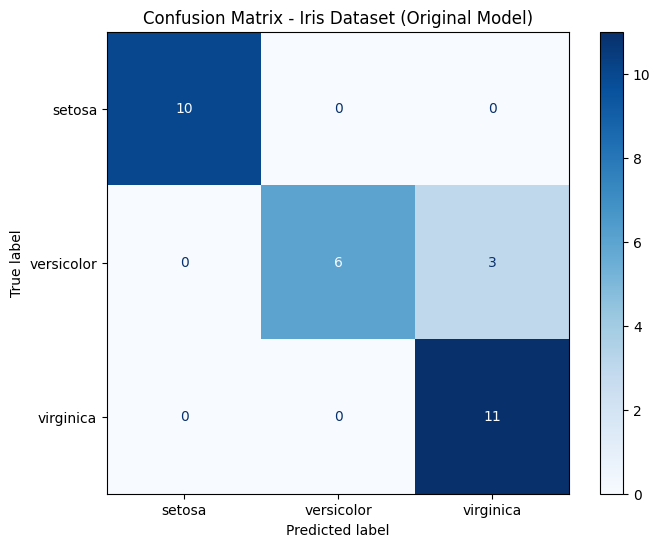

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


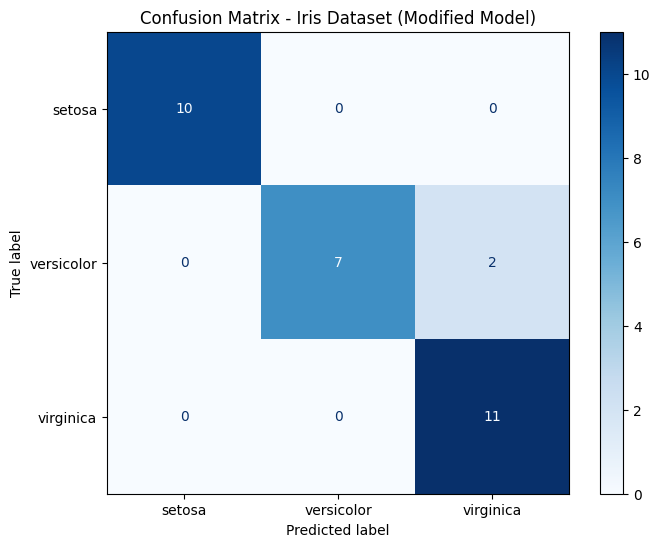

In [ ]:
# Task 1: Iris Dataset - Modify the Neural Network

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to preprocess dataset (standardization and one-hot encoding)
def preprocess_data(X, y):
    X = StandardScaler().fit_transform(X)
    y_encoded = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
    return X, y_encoded

# Function to build and compile a model
def build_model(input_shape, hidden_layers, output_units):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(input_shape,)))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(output_units, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to visualize training results
def plot_training_results(history, title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to generate and plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, labels, dataset_name):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(
        cmap=plt.cm.Blues, ax=plt.gca()
    )
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.show()

# Load and preprocess Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_iris, y_iris = preprocess_data(X_iris, y_iris)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

# Build and train the original model
original_model = build_model(input_shape=X_train_iris.shape[1], hidden_layers=[8], output_units=3)
history_original = original_model.fit(
    X_train_iris, y_train_iris, validation_split=0.2, epochs=50, batch_size=16, verbose=1
)

# Build and train the modified model
modified_model = build_model(input_shape=X_train_iris.shape[1], hidden_layers=[8, 16], output_units=3)
history_modified = modified_model.fit(
    X_train_iris, y_train_iris, validation_split=0.2, epochs=50, batch_size=16, verbose=1
)

# Visualization for Task 1
plot_training_results(history_original, "Original Model (Iris Dataset)")
plot_training_results(history_modified, "Modified Model (Iris Dataset)")

# Confusion Matrices for Task 1
plot_confusion_matrix(
    original_model, X_test_iris, y_test_iris, labels=iris.target_names, dataset_name="Iris Dataset (Original Model)"
)
plot_confusion_matrix(
    modified_model, X_test_iris, y_test_iris, labels=iris.target_names, dataset_name="Iris Dataset (Modified Model)"
)


---

## **Part 2: Applying to the Wine Dataset**

### **Step 1: Load and Preprocess the Wine Dataset**
- **Dataset**: The Wine dataset from Scikit-Learn, used for classification of wine types.
- **Preprocessing**:
  - The features are standardized to ensure consistent scaling.
  - Target labels are one-hot encoded for multi-class classification.

### **Step 2: Build and Train the Neural Network**
- **Architecture**:
  - Two hidden layers are used, with 8 and 16 neurons, respectively, and ReLU activation.
  - The output layer uses softmax activation for classification into 3 classes.
- The model is trained using cross-entropy loss and Adam optimizer, and training/validation metrics are recorded.

### **Step 3: Visualize Results**
- Loss and accuracy over epochs are plotted for training and validation phases.
- A confusion matrix is generated to analyze classification performance on the test data.

---

## **Deliverables**
1. **Modified Neural Network**:
   - An extended model with an additional hidden layer trained on the Iris dataset.
   - Comparison of performance metrics between the original and modified models.

2. **Wine Dataset Neural Network**:
   - Complete model implementation for classifying the Wine dataset.
   - Visualizations such as loss/accuracy plots and confusion matrix.

3. **Discussion and Analysis**:
   - The effect of adding additional layers on the Iris dataset.
   - Performance comparison between the simpler Iris dataset and the more complex Wine dataset.

---

## **Conclusion**
- **Adding Layers**: The additional hidden layer improves the model's learning capacity, but excessive layers might lead to overfitting on smaller datasets like Iris.
- **Dataset Complexity**: Performance differences highlight the role of dataset complexity, feature scaling, and class distribution in neural network training.

---

This explanation provides an overview and understanding of the tasks and expected results for the Colab file.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.1901 - loss: 1.5730 - val_accuracy: 0.1379 - val_loss: 1.6535
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1805 - loss: 1.5029 - val_accuracy: 0.1379 - val_loss: 1.5165
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2389 - loss: 1.4267 - val_accuracy: 0.1724 - val_loss: 1.4116
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2422 - loss: 1.2804 - val_accuracy: 0.1724 - val_loss: 1.3276
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2580 - loss: 1.2130 - val_accuracy: 0.2069 - val_loss: 1.2608
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3547 - loss: 1.1641 - val_accuracy: 0.3103 - val_loss: 1.2029
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3810 - loss: 1.0558 - val_accuracy: 0.4138 - val_loss: 1.1515
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4052 - loss: 1.1331 - val_accuracy: 0.4483 - val_loss: 1.1091
Epoch 

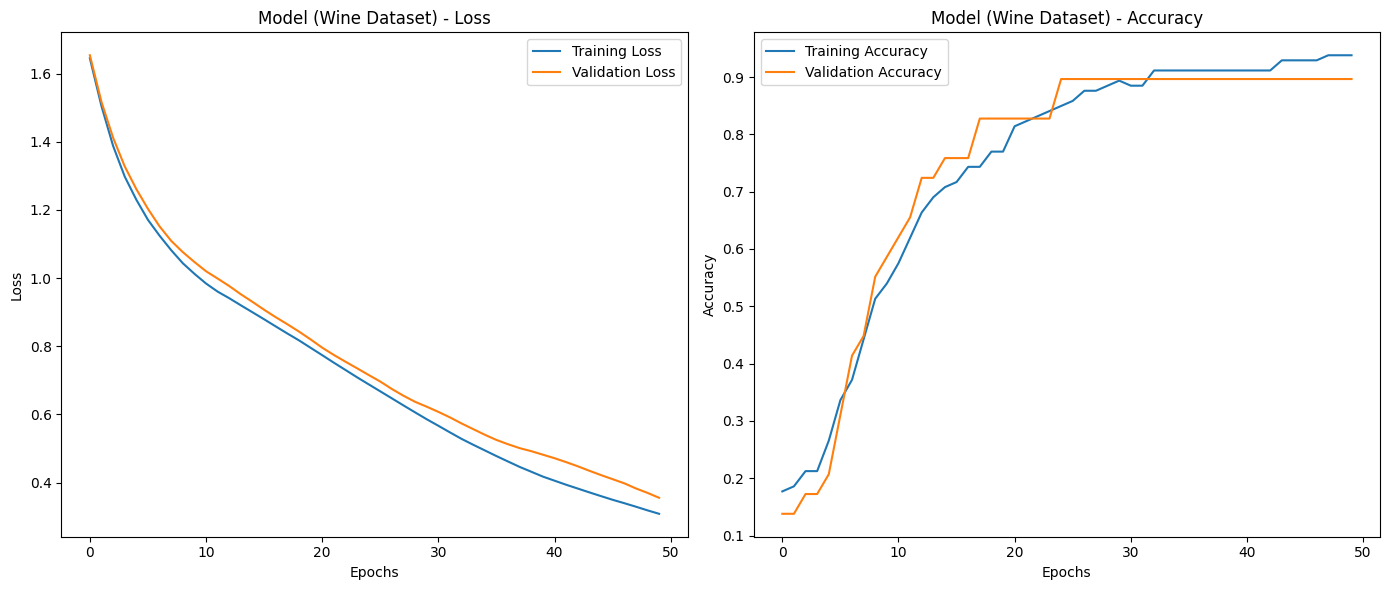

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


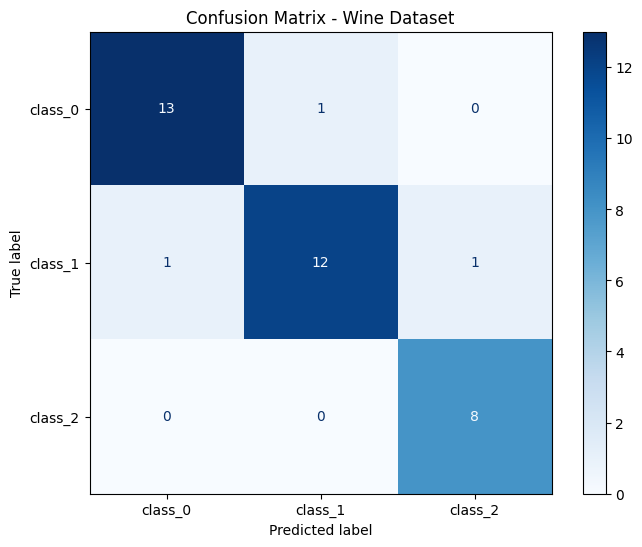

In [ ]:
# Task 2: Wine Dataset - Build and Train a Neural Network

# Import necessary libraries (reuse imports from Task 1)
from sklearn.datasets import load_wine

# Load and preprocess Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_wine, y_wine = preprocess_data(X_wine, y_wine)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

# Build and train the model for the Wine dataset
wine_model = build_model(input_shape=X_train_wine.shape[1], hidden_layers=[8, 16], output_units=3)
history_wine = wine_model.fit(
    X_train_wine, y_train_wine, validation_split=0.2, epochs=50, batch_size=16, verbose=1
)

# Visualization for Task 2
plot_training_results(history_wine, "Model (Wine Dataset)")

# Confusion Matrix for Task 2
plot_confusion_matrix(
    wine_model, X_test_wine, y_test_wine, labels=wine.target_names, dataset_name="Wine Dataset"
)
